In [163]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [164]:
df=pd.read_csv("hotel_bookings.csv")

## 📊 Dataset Columns Description

| Column Name                   | Description                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| **hotel**                      | نوع الفندق (City Hotel أو Resort Hotel).                                    |
| **is_canceled**                | هل الحجز تم إلغاؤه (1 = أُلغي، 0 = لم يُلغ).                                |
| **lead_time**                  | عدد الأيام بين تاريخ الحجز الفعلي وتاريخ الوصول.                           |
| **arrival_date_year**          | سنة الوصول.                                                                |
| **arrival_date_month**         | شهر الوصول (مثال: January, February, …).                                   |
| **arrival_date_week_number**   | رقم الأسبوع في السنة الذي يوافق تاريخ الوصول.                             |
| **arrival_date_day_of_month**  | يوم الوصول في الشهر (1–31).                                                |
| **stays_in_weekend_nights**    | عدد ليالي الإقامة في عطلة نهاية الأسبوع (جمعة/سبت).                        |
| **stays_in_week_nights**       | عدد ليالي الإقامة في أيام الأسبوع (الأحد – الخميس).                        |
| **adults**                     | عدد البالغين.                                                              |
| **children**                   | عدد الأطفال.                                                               |
| **babies**                     | عدد الرُضّع.                                                                |
| **meal**                       | نوع الوجبة (BB = Bed & Breakfast, HB = Half Board).                        |
| **country**                    | بلد الزائر (رمز الدولة المكون من 3 حروف).                                 |
| **market_segment**             | مصدر الحجز (مثلاً: Direct, Corporate, Online TA).                          |
| **distribution_channel**       | قناة توزيع الحجز (Direct, TA/TO).                                          |
| **is_repeated_guest**          | هل الزائر ضيف متكرر (1 = نعم، 0 = لا).                                    |
| **previous_cancellations**     | عدد الحجوزات السابقة التي ألغاها العميل.                                   |
| **previous_bookings_not_canceled** | عدد الحجوزات السابقة التي لم تُلغَ.                                   |
| **reserved_room_type**         | نوع الغرفة المحجوزة (رمز بالحروف).                                         |
| **assigned_room_type**         | نوع الغرفة المخصصة فعليًا للعميل.                                          |
| **booking_changes**            | عدد التغييرات التي أجراها العميل على الحجز.                               |
| **deposit_type**               | نوع العربون (No Deposit, Non Refund, Refundable).                          |
| **agent**                      | رقم معرّف وكالة السفر (إن وجد).                                            |
| **company**                    | رقم معرّف الشركة (إن وجد).                                                 |
| **days_in_waiting_list**       | عدد الأيام التي ظل فيها الحجز في قائمة الانتظار.                           |
| **customer_type**              | نوع العميل (Transient, Contract, Group, Transient-Party).                  |
| **adr**                        | السعر المتوسط اليومي (Average Daily Rate) — تكلفة الغرفة لليلة.            |
| **required_car_parking_spaces**| عدد أماكن ركن السيارات المطلوبة.                                           |
| **total_of_special_requests**  | عدد الطلبات الخاصة من العميل (مثل سرير إضافي).                             |
| **reservation_status**         | الحالة النهائية للحجز (Canceled, Check-Out, No-Show).                      |
| **reservation_status_date**    | تاريخ آخر تحديث لحالة الحجز.                                               |


In [165]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data cleaning 

In [166]:
df["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [167]:
df.drop(df.loc[df["is_canceled"]==99].index, inplace=True)

In [168]:
print(df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:",df.shape)

(119390, 32)
After removing duplicates: (87396, 32)


In [169]:
df.isna().sum()*100/len(df)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [170]:
print(df.loc[df["company"]==0,"company"])
df["company"]=df["company"].fillna(0)

Series([], Name: company, dtype: float64)


In [171]:
a=df.loc[ (df["distribution_channel"]=="Direct"), ["agent", "distribution_channel"]]
a.value_counts().head(5)

agent  distribution_channel
14.0   Direct                  3342
250.0  Direct                  2736
273.0  Direct                   109
240.0  Direct                    43
45.0   Direct                    29
Name: count, dtype: int64

In [172]:
print(df.loc[df["agent"]==0,"agent"])
df["agent"]=df["agent"].fillna(0)

Series([], Name: agent, dtype: float64)


In [173]:
df["children"].describe()

count    87392.000000
mean         0.138640
std          0.455881
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

In [174]:
df["children"]=df["children"].fillna(0)

In [175]:
df["country"]=df["country"].fillna("Unknown")

In [176]:
df.isna().sum()*100/len(df)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

In [177]:
df["adr"].describe()

count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [178]:
df["adr"]=df["adr"].abs()

In [179]:
df.loc[df["adr"]==0,"adr"]

0         0.0
1         0.0
125       0.0
167       0.0
168       0.0
         ... 
118631    0.0
118762    0.0
118963    0.0
119102    0.0
119124    0.0
Name: adr, Length: 1778, dtype: float64

In [180]:
df["adr"].describe()

count    87396.000000
mean       106.337392
std         55.013671
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [190]:
df.loc[df["adr"]==0,"adr"]=df["adr"].median()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'is_canceled'),
  Text(1, 0, 'lead_time'),
  Text(2, 0, 'arrival_date_year'),
  Text(3, 0, 'arrival_date_week_number'),
  Text(4, 0, 'arrival_date_day_of_month'),
  Text(5, 0, 'stays_in_weekend_nights'),
  Text(6, 0, 'stays_in_week_nights'),
  Text(7, 0, 'adults'),
  Text(8, 0, 'children'),
  Text(9, 0, 'babies'),
  Text(10, 0, 'is_repeated_guest'),
  Text(11, 0, 'previous_cancellations'),
  Text(12, 0, 'previous_bookings_not_canceled'),
  Text(13, 0, 'booking_changes'),
  Text(14, 0, 'agent'),
  Text(15, 0, 'company'),
  Text(16, 0, 'days_in_waiting_list'),
  Text(17, 0, 'adr'),
  Text(18, 0, 'required_car_parking_spaces'),
  Text(19, 0, 'total_of_special_requests')])

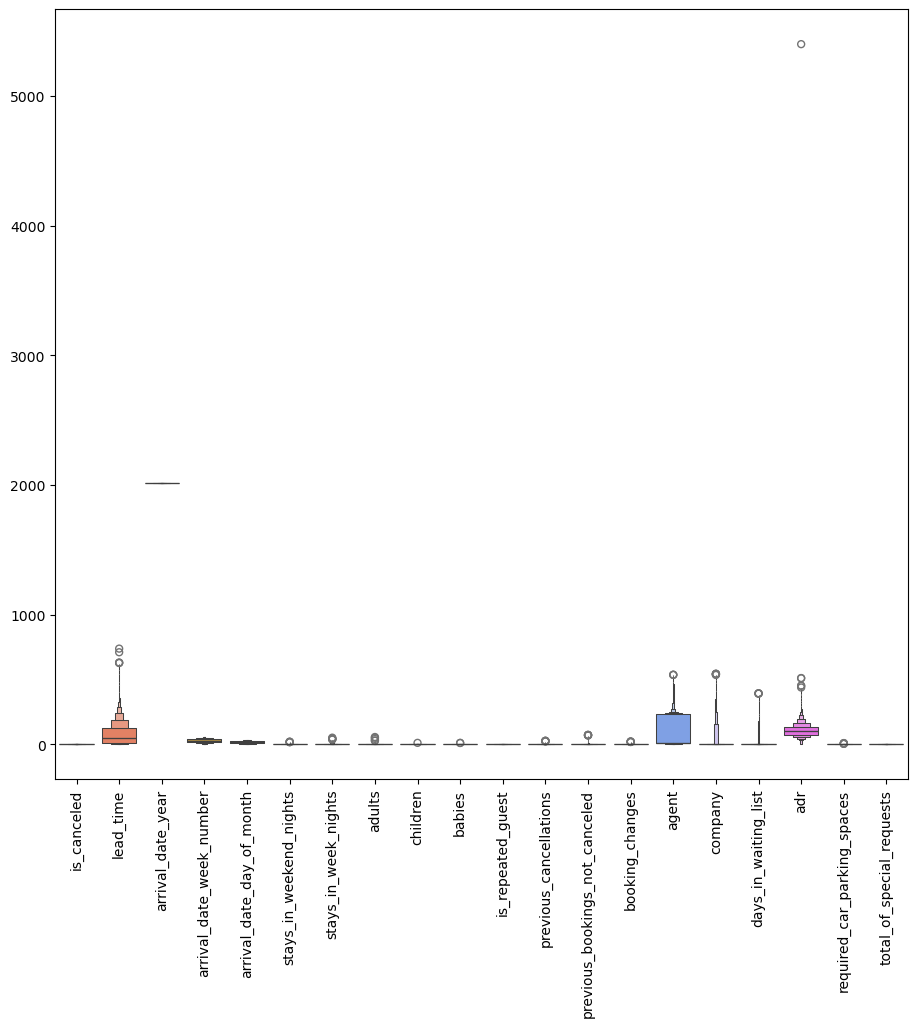

In [181]:
plt.figure(figsize=(11,10))
sns.boxenplot(df)
plt.xticks(rotation=90)

In [182]:
Q1 = df["adr"].quantile(0.25)
Q3 = df["adr"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["adr"] >= lower_bound) & (df["adr"] <= upper_bound)]

In [183]:
df["lead_time"].describe()

count    84906.000000
mean        80.136775
std         86.457750
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

In [184]:
df=df[df["lead_time"]<=365]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'is_canceled'),
  Text(1, 0, 'lead_time'),
  Text(2, 0, 'arrival_date_year'),
  Text(3, 0, 'arrival_date_week_number'),
  Text(4, 0, 'arrival_date_day_of_month'),
  Text(5, 0, 'stays_in_weekend_nights'),
  Text(6, 0, 'stays_in_week_nights'),
  Text(7, 0, 'adults'),
  Text(8, 0, 'children'),
  Text(9, 0, 'babies'),
  Text(10, 0, 'is_repeated_guest'),
  Text(11, 0, 'previous_cancellations'),
  Text(12, 0, 'previous_bookings_not_canceled'),
  Text(13, 0, 'booking_changes'),
  Text(14, 0, 'agent'),
  Text(15, 0, 'company'),
  Text(16, 0, 'days_in_waiting_list'),
  Text(17, 0, 'adr'),
  Text(18, 0, 'required_car_parking_spaces'),
  Text(19, 0, 'total_of_special_requests')])

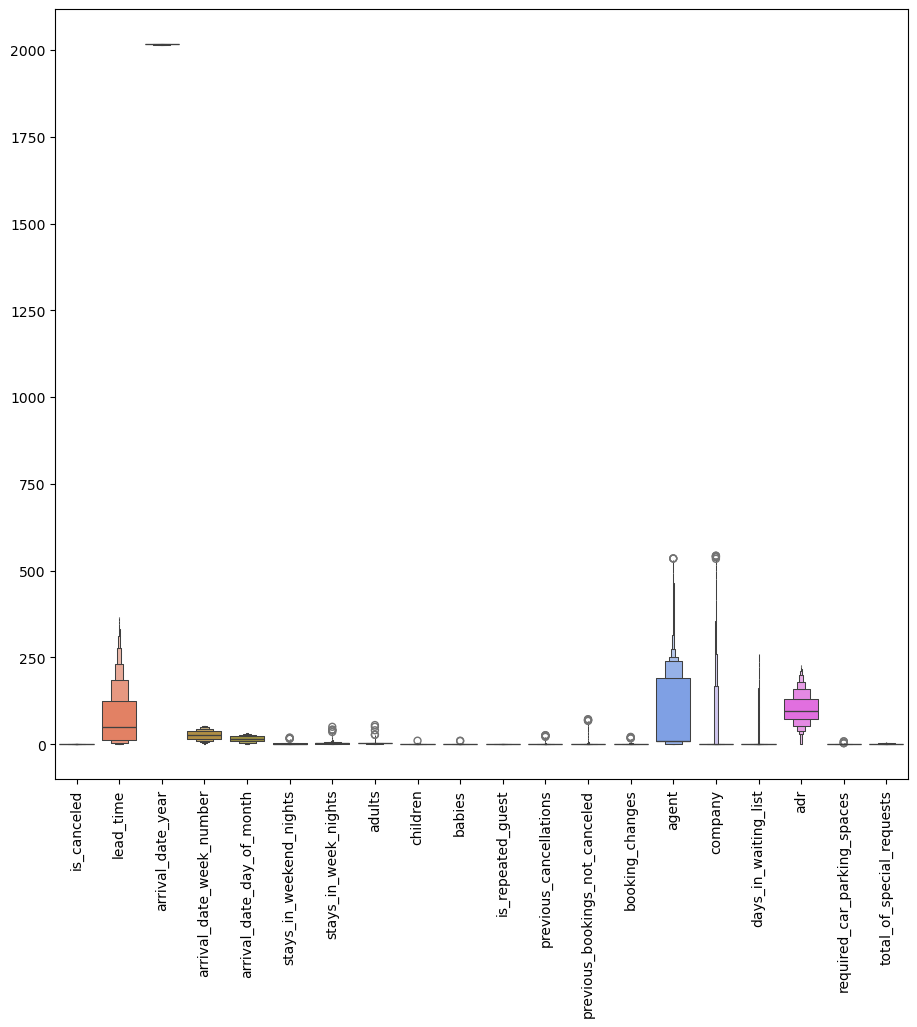

In [185]:
plt.figure(figsize=(11,10))
sns.boxenplot(df)
plt.xticks(rotation=90)

# Data Viuslzation

<Axes: xlabel='customer_type', ylabel='count'>

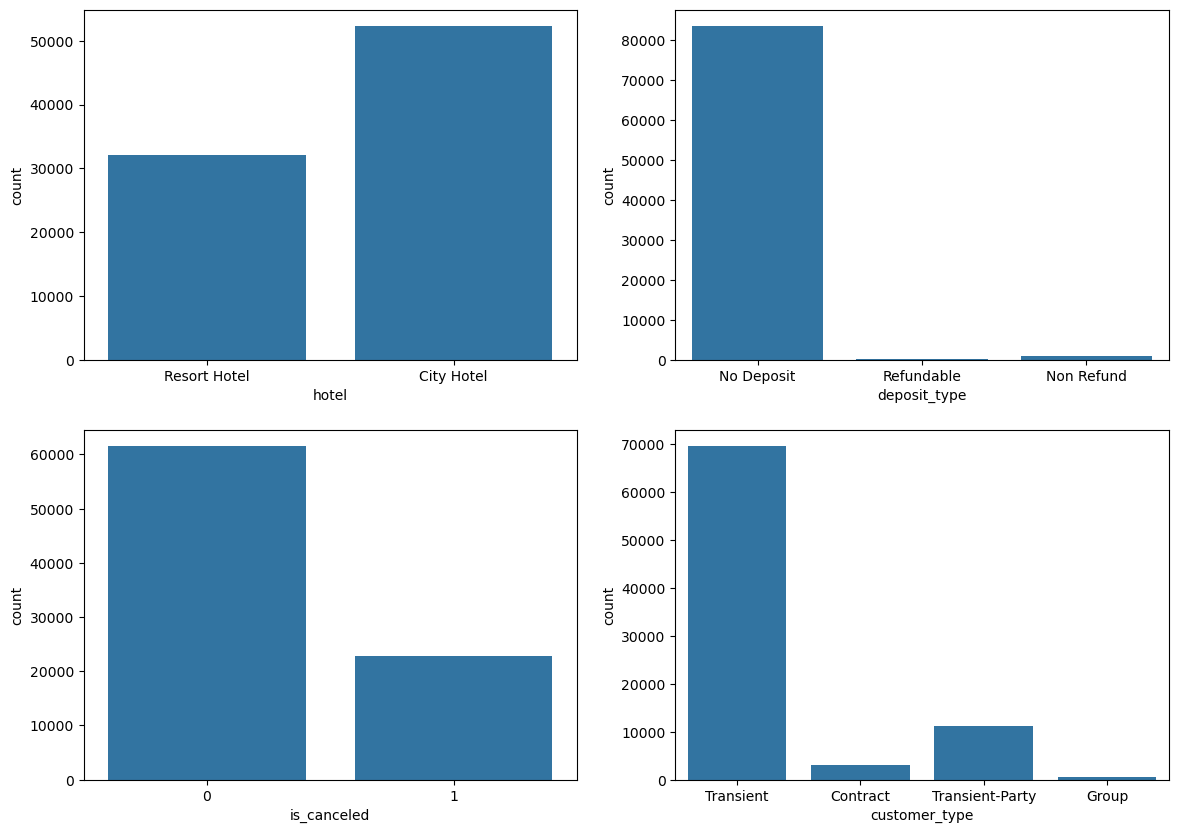

In [186]:
fig,ax=plt.subplots(figsize=(14,10),nrows=2,ncols=2)
sns.countplot(data=df,x="hotel",ax=ax[0,0])
sns.countplot(data=df,x="deposit_type",ax=ax[0,1])
sns.countplot(data=df,x="is_canceled",ax=ax[1,0])
sns.countplot(data=df,x="customer_type",ax=ax[1,1])


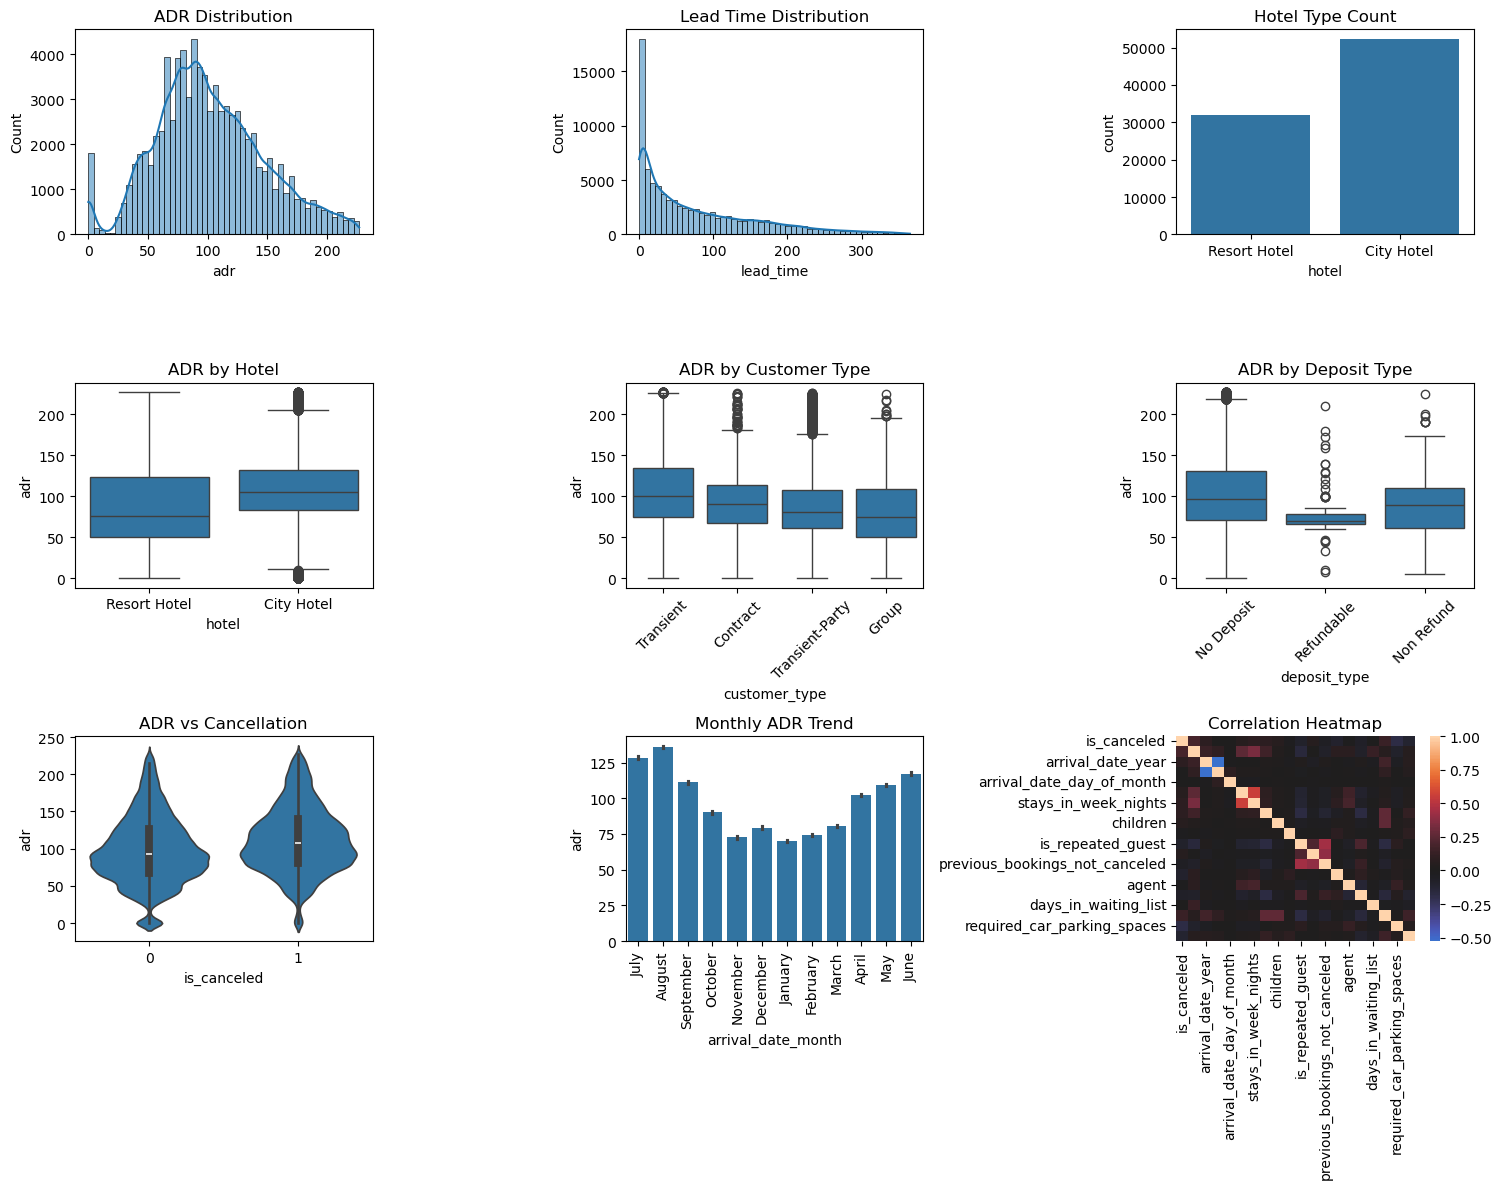

In [187]:
fig, ax = plt.subplots(3, 3, figsize=(15, 12))

# Distribution of ADR
sns.histplot(df["adr"], bins=50, kde=True, ax=ax[0,0])
ax[0,0].set_title("ADR Distribution")

# Lead time distribution
sns.histplot(df["lead_time"], bins=50, kde=True, ax=ax[0,1])
ax[0,1].set_title("Lead Time Distribution")

# Hotel type count
sns.countplot(data=df, x="hotel", ax=ax[0,2])
ax[0,2].set_title("Hotel Type Count")

# ADR vs Hotel
sns.boxplot(data=df, x="hotel", y="adr", ax=ax[1,0])
ax[1,0].set_title("ADR by Hotel")

# ADR vs Customer type
sns.boxplot(data=df, x="customer_type", y="adr", ax=ax[1,1])
ax[1,1].set_title("ADR by Customer Type")
ax[1,1].tick_params(axis='x', rotation=45)

# ADR vs Deposit type
sns.boxplot(data=df, x="deposit_type", y="adr", ax=ax[1,2])
ax[1,2].set_title("ADR by Deposit Type")
ax[1,2].tick_params(axis='x', rotation=45)

# ADR vs Is Canceled
sns.violinplot(data=df, x="is_canceled", y="adr", ax=ax[2,0])
ax[2,0].set_title("ADR vs Cancellation")

# Monthly ADR trend
sns.barplot(data=df, x="arrival_date_month", y="adr", ax=ax[2,1], estimator=np.mean)
ax[2,1].set_title("Monthly ADR Trend")
ax[2,1].tick_params(axis='x', rotation=90)

# Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr,center=0, ax=ax[2,2])
ax[2,2].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


# Make data ready to model

In [188]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include="object").columns:
    df[i]=le.fit_transform(df[i])